#### Use your own Yelp API key, perform a query and create a visualization. 

For example, you can:
1. Show the relationship between review rating of Mexican restaurants and their review counts
2. The average rating of Mexican restaurants in the Bronx
3. The average number of reviews for Mexican restaurants in the Bronx

In [1]:
import pandas as pd
import numpy as np
import requests 
import json
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [5]:
#MY_API_KEY = "/Users/candaur/.secret/yelp_api.json"
MY_API_KEY = "yelp_API_here" #from --> https://www.yelp.com/developers/v3/manage_app

term = 'Mexican Restaurant'
location = 'Bronx'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = { #defining as a dictionary called 
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'), ## from reading the documentation
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [6]:
response.status_code

200

In [11]:
print(response.text)

{"businesses": [{"id": "2iqsjuh8Mpm_3p6s-G9zkQ", "alias": "taqueria-tlaxcalli-bronx-3", "name": "Taqueria Tlaxcalli", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/zfErzeppZ43-1laa0LAW-g/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/taqueria-tlaxcalli-bronx-3?adjust_creative=845s0SBG-kSLdBWbqv2MKQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=845s0SBG-kSLdBWbqv2MKQ", "review_count": 629, "categories": [{"alias": "mexican", "title": "Mexican"}], "rating": 4.5, "coordinates": {"latitude": 40.83624, "longitude": -73.854962}, "transactions": ["delivery"], "price": "$$", "location": {"address1": "2103 Starling Ave", "address2": "", "address3": null, "city": "Bronx", "zip_code": "10462", "country": "US", "state": "NY", "display_address": ["2103 Starling Ave", "Bronx, NY 10462"]}, "phone": "+13478513085", "display_phone": "(347) 851-3085", "distance": 2236.4527042850304}, {"id": "pMUsX9vXcHcS9KTRbFewbw", "alias": "picante-picante-bronx-4", "name"

In [8]:
mexican_restaurant = response.text
mexican_restaurant = json.loads(mexican_restaurant)

In [9]:
for key in mexican_restaurant.keys():
    print(key)

businesses
total
region


In [39]:
mexican_restaurant['businesses']

[{'id': '2iqsjuh8Mpm_3p6s-G9zkQ',
  'alias': 'taqueria-tlaxcalli-bronx-3',
  'name': 'Taqueria Tlaxcalli',
  'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/zfErzeppZ43-1laa0LAW-g/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/taqueria-tlaxcalli-bronx-3?adjust_creative=845s0SBG-kSLdBWbqv2MKQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=845s0SBG-kSLdBWbqv2MKQ',
  'review_count': 625,
  'categories': [{'alias': 'mexican', 'title': 'Mexican'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.83624, 'longitude': -73.854962},
  'transactions': ['pickup', 'delivery'],
  'price': '$$',
  'location': {'address1': '2103 Starling Ave',
   'address2': '',
   'address3': None,
   'city': 'Bronx',
   'zip_code': '10462',
   'country': 'US',
   'state': 'NY',
   'display_address': ['2103 Starling Ave', 'Bronx, NY 10462']},
  'phone': '+13478513085',
  'display_phone': '(347) 851-3085',
  'distance': 2236.4527042850304},
 {'id': 'pMUsX9vXcHcS9KTRbFew

In [18]:
# mexican_restaurant = response.text
# mexican_restaurant = json.loads(mexican_restaurant)

In [19]:
## How many Mexican restaurants in the Bronx?
mexican_restaurant['total']

3000

In [21]:
df = pd.DataFrame.from_dict(mexican_restaurant['businesses'])
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,2iqsjuh8Mpm_3p6s-G9zkQ,taqueria-tlaxcalli-bronx-3,Taqueria Tlaxcalli,https://s3-media3.fl.yelpcdn.com/bphoto/zfErze...,False,https://www.yelp.com/biz/taqueria-tlaxcalli-br...,625,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,"{'latitude': 40.83624, 'longitude': -73.854962}","[pickup, delivery]",$$,"{'address1': '2103 Starling Ave', 'address2': ...",+13478513085,(347) 851-3085,2236.452704
1,pMUsX9vXcHcS9KTRbFewbw,picante-picante-bronx-4,Picante Picante,https://s3-media4.fl.yelpcdn.com/bphoto/25psww...,False,https://www.yelp.com/biz/picante-picante-bronx...,159,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 40.8781, 'longitude': -73.903}","[pickup, delivery]",$$,"{'address1': '156 W 231st St', 'address2': '',...",+17187087100,(718) 708-7100,3924.302458
2,08KCenrjRbL7vzfHjdGYyg,estrellita-poblana-iv-bronx,Estrellita Poblana IV,https://s3-media3.fl.yelpcdn.com/bphoto/yyxbzt...,False,https://www.yelp.com/biz/estrellita-poblana-iv...,177,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,"{'latitude': 40.84221, 'longitude': -73.84381}",[delivery],$$,"{'address1': '45 Westchester Sq', 'address2': ...",+17182398290,(718) 239-8290,2598.978741
3,hdBhZcdZGHkTESrldAObJg,la-morada-bronx-2,La Morada,https://s3-media4.fl.yelpcdn.com/bphoto/ACBPIZ...,False,https://www.yelp.com/biz/la-morada-bronx-2?adj...,168,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",4.5,"{'latitude': 40.810552, 'longitude': -73.92142}","[delivery, pickup]",$$,"{'address1': '308 Willis Ave', 'address2': '',...",+17182920235,(718) 292-0235,6258.350692
4,8ofN8cBJd2oTmdbMzlY1zA,maisonetta-bronx,MAiSONETTA,https://s3-media4.fl.yelpcdn.com/bphoto/Y_2Zc9...,False,https://www.yelp.com/biz/maisonetta-bronx?adju...,3,"[{'alias': 'french', 'title': 'French'}, {'ali...",5.0,"{'latitude': 40.808734, 'longitude': -73.9291428}","[pickup, delivery]",NaN,"{'address1': '141 Lincoln Ave', 'address2': No...",,,6854.519997


In [24]:
## average rating
df.rating.mean()

4.09

In [22]:
## average review_count
df.review_count.mean()


135.44

In [27]:
# df_rating = df.sort_values(by='rating')
# df_rating

In [26]:
# df_count = df.sort_values(by='review_count', ascending=False)
# df_count

In [89]:
## What is the relationship between and review count and ratings?


In [30]:
# df_rating.groupby('rating').head()
df.groupby(['rating', 'review_count'])#.hist()

#df_rating['rating'].hist(by=df['Letter'])

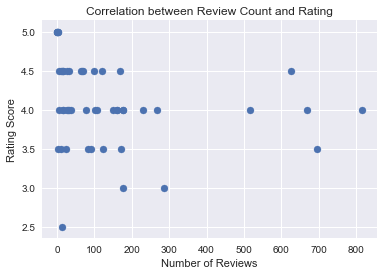

In [40]:
plt.scatter(df.review_count, df.rating)
plt.ylabel('Rating Score')
plt.xlabel('Number of Reviews')
plt.title('Correlation between Review Count and Rating')
plt.show()

In [ ]:
## How do I turn this into a histogram?
## df['N'].hist(by=df['Letter'])